(credit : Jose Portilla, Pierian Data www.pieriantraining.com)

Business Case : Find out if the e-commerce clothing store should focus more on their mobile app experience or the website

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

In [3]:
customers = pd.read_csv('Ecommerce Customers')

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## EDA

In [7]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

##### Relationship between time spent on WEBSITE and yearly spending

Text(0.5, 1.25, 'Time on Website vs Yearly Amount Spent')

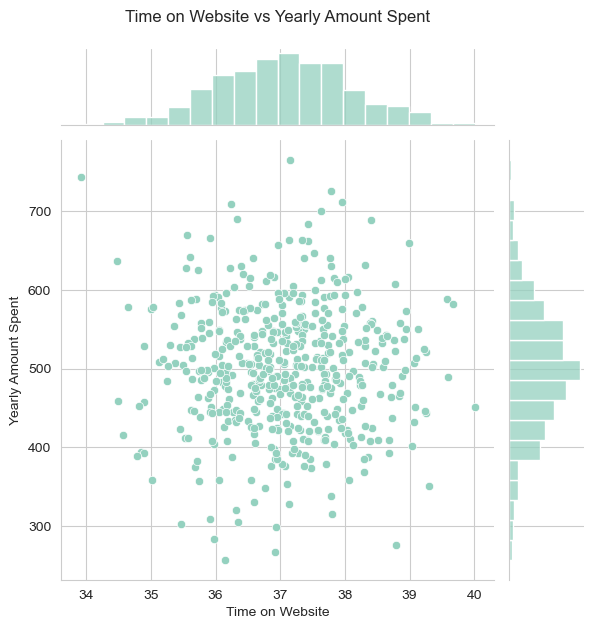

In [17]:
sns.jointplot(customers, x = 'Time on Website', y = 'Yearly Amount Spent')

plt.title('Time on Website vs Yearly Amount Spent', y = 1.25)

##### Relationship between time spent on APP and yearly spending

Text(0.5, 1.25, 'Time on App vs Yearly Amount Spent')

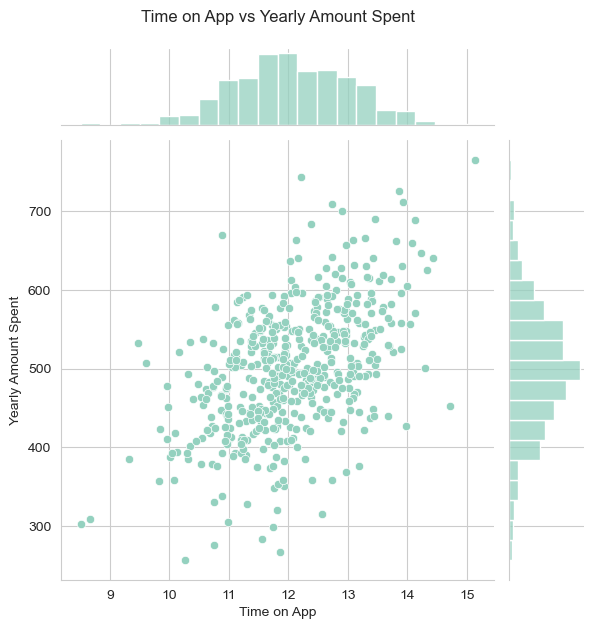

In [18]:
sns.jointplot(customers, x = 'Time on App', y = 'Yearly Amount Spent')

plt.title('Time on App vs Yearly Amount Spent', y = 1.25)

##### Relationship between time spent on APP and length of membership

Text(0.5, 1.25, 'Time on App vs Length of Membership')

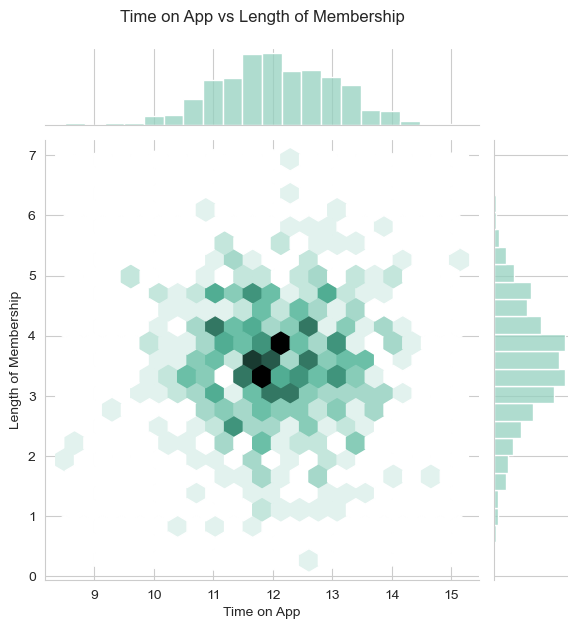

In [19]:
sns.jointplot(customers, x = 'Time on App', y = 'Length of Membership', kind = 'hex')

plt.title('Time on App vs Length of Membership', y = 1.25)

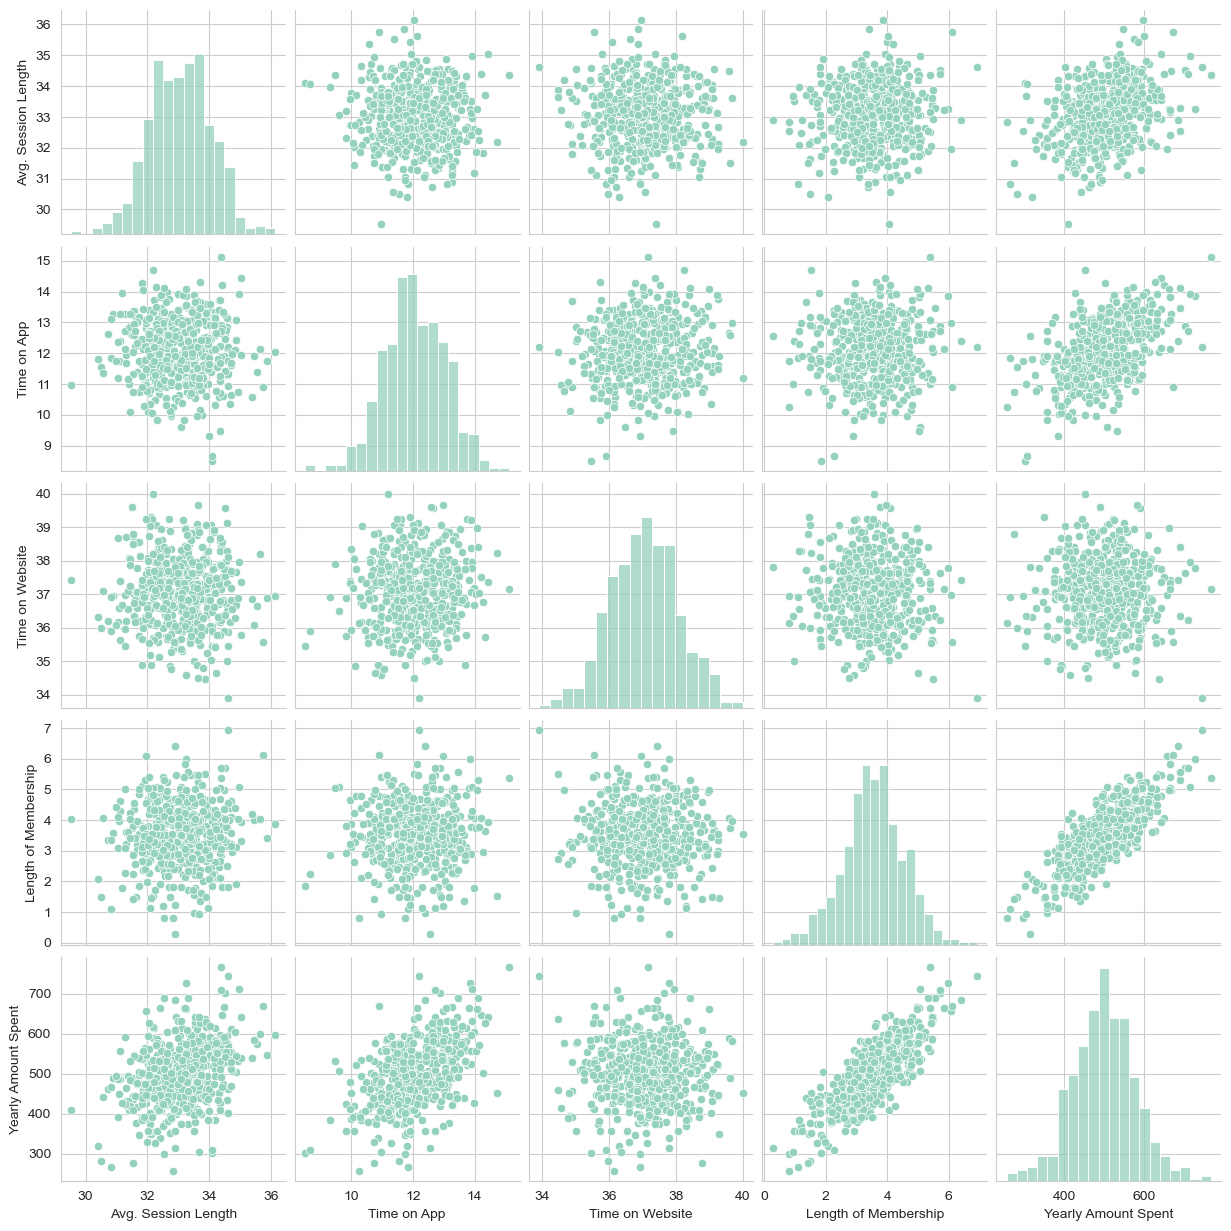

In [20]:
sns.pairplot(customers)

In [21]:
# Length of Membership is the most correlated feature with Yearly Amount Spent

##### Yearly Amount Spent vs Length of Membership

Text(0.5, 1.0, 'Yearly Amount Spent vs Length of Membership')

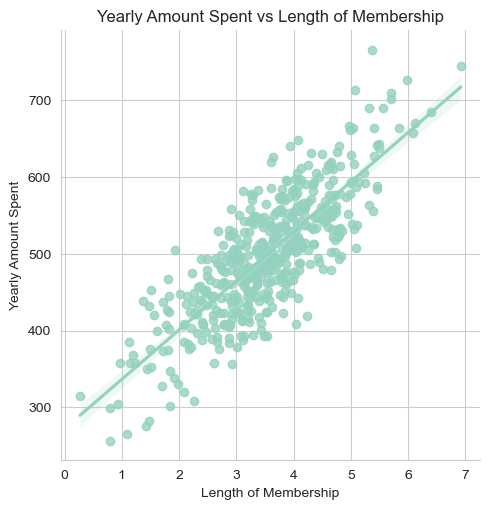

In [23]:
sns.lmplot(customers, x = 'Length of Membership', y = 'Yearly Amount Spent')

plt.title('Yearly Amount Spent vs Length of Membership')

## Linear Regression

##### Set Split

In [24]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [25]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

##### Model

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

##### Coefficients

In [35]:
coeffs = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficient'])
coeffs

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


##### Prediction

In [29]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

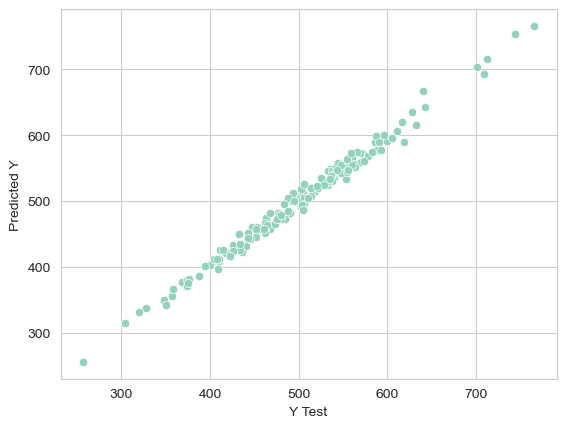

In [30]:
sns.scatterplot(x = y_test, y = predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

##### Evaluation

In [31]:
from sklearn import metrics

In [32]:
print('MAE : ', metrics.mean_absolute_error(y_test, predictions))
print('MSE : ', metrics.mean_squared_error(y_test, predictions))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE :  7.2281486534308295
MSE :  79.81305165097444
RMSE :  8.933815066978633


In [33]:
# R squared
metrics.explained_variance_score(y_test, predictions)

0.9890771231889606

##### Residuals

<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

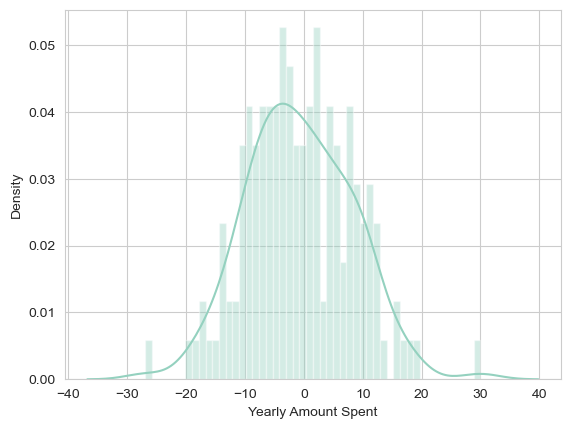

In [34]:
sns.distplot((y_test - predictions), bins = 50)

In [ ]:
# Time on Website shows almost no correlation to Yearly Amount Spent. Length of Membership is the most correlative to Yearly Amount Spent.
# Should focus more on the app since working on the website would not bring big changes in terms of customer spending. 
# (or, should focus more on the website since it is our weakness)
# But the best approach will be focusing on keeping the customer engaged by conducting targeted marketing, engagement-inducing benefits for members.